# L01 - Intro

Code given:

$\begin{array}{rl} F_1 &= \frac{2pr}{p+r} \end{array}$

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


In [3]:
import os
# os.path.join handles the path
datapath = os.path.join("GITMAL", "datasets", "lifesat", "")

# This check ensures you are in the right place before loading data
if not os.path.exists(datapath):
    print(f"ERROR: Datapath not found at {os.path.abspath(datapath)}")
else:
    print(f"OK: Found datasets at {os.path.abspath(datapath)}")

# Run system command to verify files exist
! dir "{datapath}"

OK: Found datasets at c:\Users\bruger\Desktop\unii\6.sem\SWMAL\git-rep\SWMALLER-1\O1\GITMAL\datasets\lifesat
 Volume in drive C has no label.
 Volume Serial Number is 1E52-7239

 Directory of c:\Users\bruger\Desktop\unii\6.sem\SWMAL\git-rep\SWMALLER-1\O1\GITMAL\datasets\lifesat

11-02-2026  12:12    <DIR>          .
11-02-2026  12:12    <DIR>          ..
03-02-2026  14:25            36.323 gdp_per_capita.csv
03-02-2026  14:25               814 lifesat.csv
03-02-2026  14:25           405.467 oecd_bli_2015.csv
03-02-2026  14:25             4.405 README.md
               4 File(s)        447.009 bytes
               2 Dir(s)  293.013.516.288 bytes free


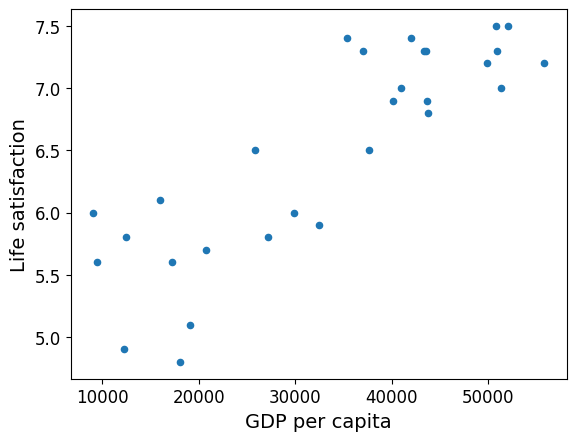

[[5.96242338]]
OK


In [4]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

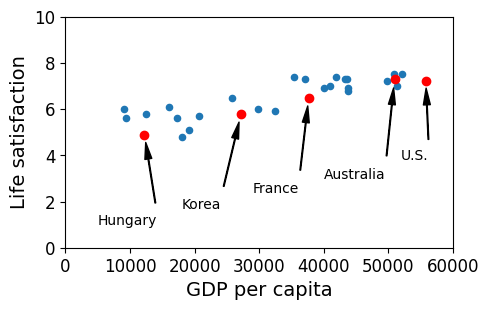

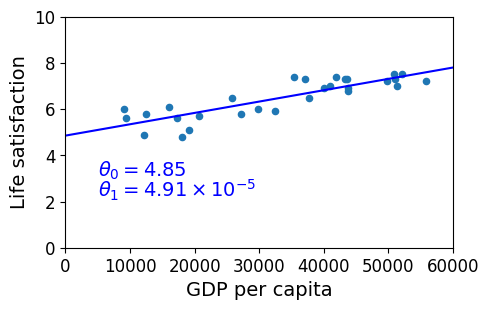

OK


In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

### 1.4.2. Qa) The parameters $\theta_0$ and $\theta_1$ and $R^2$ the Score

Finding the and is relatively simple in our notation, referencing https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html it is done by extracting .intercept and .coef

In [6]:
theta_0 = model.intercept_
theta_1 = model.coef_
print("theta_0 and theta_1 are respectively", theta_0, theta_1)

theta_0 and theta_1 are respectively [4.8530528] [[4.91154459e-05]]


In [7]:
R2 = model.score(X,y)
print("R2 is then extracted to be", R2)

R2 is then extracted to be 0.7344414355437031


And so we have extracted the score = 0.734. The $R^2$ value has a range of $]-infinity, 1]$, with the higher (the closer to 1) the better a score. The $R^2$ is a goodness of fit function, measuring how well the model captures data patterns. 

### Qb) Using k-Nearest Neighbors

X.shape= (29, 1)
y.shape= (29, 1)


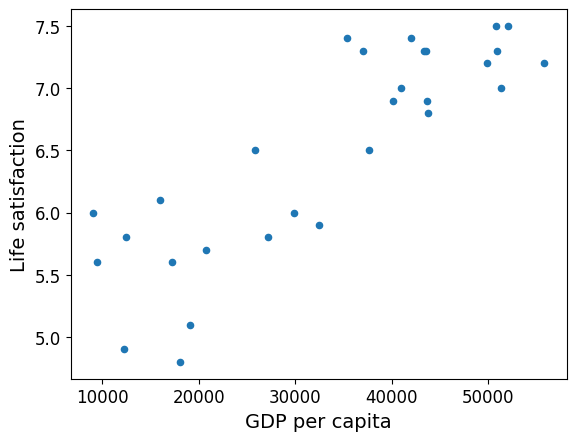

y_pred = [[5.76666667]]
The nearest neighbour models score is 0.8525732853499179


In [8]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model

# TODO: add your code here..
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
knn.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = knn.predict(X_new)
print("y_pred =", y_pred)

knnscore = knn.score(X,y)
print("The nearest neighbour models score is", knnscore)

According to https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html the Knn model also returns the $R^2$ when calling model.score. We see that it is quite a bit better than that of the linear regressor.

### 1.5.2. Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

y_pred = [[5.7]]
The nearest neighbour models score is 1.0


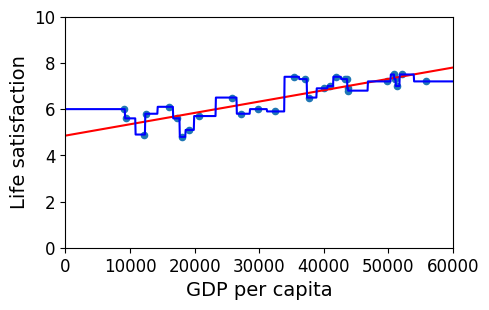

In [9]:
knn= sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)

# Train the model
knn.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = knn.predict(X_new)
print("y_pred =", y_pred)

knnscore = knn.score(X,y)
print("The nearest neighbour models score is", knnscore)

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create  test matrix M, with the same dimensionality as X, and in the range [0;60000] 
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M) 

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

When initiated with n_neighbours = 1 we get a score of 1, which indicates zero errors when tested. The reason can be found in the lines: 
knn.fit(X, y)
knnscore = knn.score(X,y)
Where we see that by not doing the data split we are both training and testing on the same data, furthermore we are training with a n.neighbors = 1 which means that the model simply copies the data at the point, meaning it perfectly predicts the test data as it has already seen it before and has the exact value copied. If we were to test with some actually new data it should become obvious that this is a case of overfitting. Meaning while a great score is produced this model would not function well on new unseen data. 

### 1.5.3. Qd) Trying out a Neural Networkfrom sklearn.neural_network import MLPRegressor

y_pred = [4.07671125]
The score for the nn is -3.6741440524093


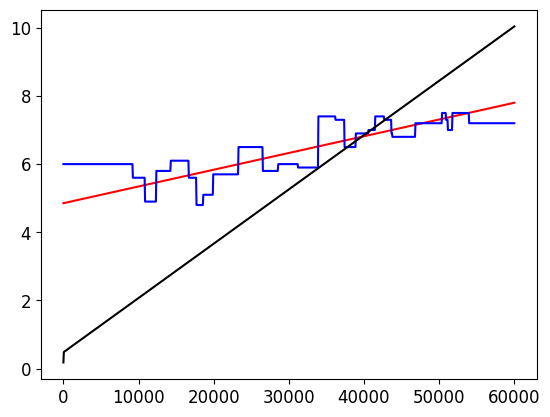

In [10]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = mlp.predict(X_new)
print("y_pred =", y_pred)

nnscore = mlp.score(X,y)
print("The score for the nn is",nnscore)

While the Neural network does return the $R^2$ value when .score is called it is clear that a score of order -$10^3$ is far from as good as the others, this might stem from the fact that this dataset is not very suitable for the MLP model, at least not without some adjustement.

### 1.5.4. Qe) Neural Network with pre-scaling

Scaled input: [[0.37645]]
y_pred = [6.11008679]
The new score for the nn is 0.7242636173560772


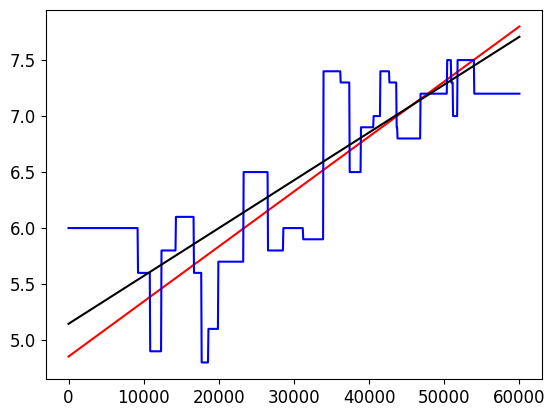

In [11]:
from sklearn.neural_network import MLPRegressor
# lets scale the data to something more suitable for the MLP using the MinMaxsclaer from sklearn
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False)
mlp.fit(X_scaled, y.ravel())

# lets make a MLP regressor prediction and redo the plots
M_scaled = scaler.fit_transform(M)
y_pred_mlp = mlp.predict(M_scaled) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita

# Scale
X_new_scaled = scaler.transform(X_new)
y_pred = mlp.predict(X_new_scaled)

print(f"Scaled input: {X_new_scaled}")
print("y_pred =", y_pred)

nnscore = mlp.score(X_scaled,y)
print("The new score for the nn is",nnscore)

We see that when the data is properly scaled to what the model might expect the $R^2$ is much better (closer to 1) while it does not fit as well as the other two models, it is better.